# Stack Overflow

## Introduction 

In this assignment, we will use some posts on Stack Overflow during the year of 2015 and measure the similarity of  users by looking at their answers' score. In order to get a full grade, do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and is due on **September 29**.

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/2-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs). You might need to install the *requests* library and an easy way to do so is by using the command [pip](https://docs.python.org/3/installing/index.html).

In [204]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)
type(response)

<Response [200]>


requests.models.Response

Now, object *response* contains the raw text of posts from the first day of 2015. 
Note that all dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [205]:
print(response.text)

{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":229,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"https://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":247,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"https://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":925,"answer_count":1,"score":1,"last_activity_dat

It is not possible to read the raw response. Instead, we need to decode the raw response as **JSON** and use the `json` library to print it. JavaScript Object Notation (JSON) is a standard text-based format for representing structured data based on JavaScript object syntax, which is commonly used for representing and transmitting data on web sites. More documentation on json objects can be found [here](https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON) 

In [206]:
import json

json_response = response.json()

print(json.dumps(json_response, indent=1))


{
 "items": [
  {
   "tags": [
    "php",
    "mysql",
    "arrays",
    "mysqli"
   ],
   "owner": {
    "reputation": 229,
    "user_id": 3210431,
    "user_type": "registered",
    "accept_rate": 78,
    "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
    "display_name": "salep",
    "link": "https://stackoverflow.com/users/3210431/salep"
   },
   "is_answered": true,
   "view_count": 247,
   "accepted_answer_id": 27727478,
   "answer_count": 2,
   "score": 0,
   "last_activity_date": 1420071815,
   "creation_date": 1420070458,
   "question_id": 27727385,
   "link": "https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
   "title": "Inserting multiple records into MySQL from an array"
  },
  {
   "tags": [
    "apache-pig"
   ],
   "owner": {
    "reputation": 6,
    "user_id": 868779,
    "user_type": "registered",
    "profile_image": "https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates and whether the question was answered. Your solution should be in the form **(creation_date,is_answered)**. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [207]:
def print_creation_dates_is_answered_json(response):
    """
    Prints the creation_date of all the questions in the response.
    
    Parameters:
        response: Response object
    """
    print([{x['creation_date'], x['is_answered']} for x in response['items']])
    
print_creation_dates_is_answered_json(json_response)

json_response



[{True, 1420070458}, {False, 1420070503}, {1420070552, True}, {1420070577, True}, {True, 1420070611}, {False, 1420070641}, {False, 1420070703}, {True, 1420070727}, {True, 1420070734}, {False, 1420070777}, {1420070801, True}, {1420070848, True}, {True, 1420070859}, {False, 1420070866}, {1420070968, True}, {False, 1420071005}, {True, 1420071029}, {True, 1420071103}, {True, 1420071122}, {True, 1420071175}, {1420071184, False}, {False, 1420071212}, {False, 1420071230}, {True, 1420071340}, {True, 1420071431}, {True, 1420071530}, {1420071736, False}, {True, 1420071794}, {True, 1420071830}, {False, 1420071868}, {True, 1420071907}, {1420071929, True}, {True, 1420071939}, {False, 1420072002}, {False, 1420072021}, {True, 1420072074}, {False, 1420072129}, {True, 1420072243}, {True, 1420072342}, {True, 1420072354}, {False, 1420072397}, {True, 1420072430}, {False, 1420072455}, {1420072481, True}, {True, 1420072610}, {True, 1420072638}, {True, 1420072667}, {True, 1420072685}, {False, 1420072777}, {T

{'has_more': True,
 'items': [{'accepted_answer_id': 27727478,
   'answer_count': 2,
   'creation_date': 1420070458,
   'is_answered': True,
   'last_activity_date': 1420071815,
   'link': 'https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array',
   'owner': {'accept_rate': 78,
    'display_name': 'salep',
    'link': 'https://stackoverflow.com/users/3210431/salep',
    'profile_image': 'https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1',
    'reputation': 229,
    'user_id': 3210431,
    'user_type': 'registered'},
   'question_id': 27727385,
   'score': 0,
   'tags': ['php', 'mysql', 'arrays', 'mysqli'],
   'title': 'Inserting multiple records into MySQL from an array',
   'view_count': 247},
  {'answer_count': 1,
   'creation_date': 1420070503,
   'is_answered': False,
   'last_activity_date': 1430411692,
   'link': 'https://stackoverflow.com/questions/27727388/apache-pig-classcast-exception-when-loading-data-with-schema',
   'owner': {'display_

Write the code that calls the ```print_creation_dates_is_answered_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). This means that after getting a request, you will need to wait for some seconds before making a new request. If you do not do that, stack exchange will block you from making any new requests. **(5 pts)**

In [208]:
from time import sleep

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00


page = 1
my_response = (requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(page) + "&pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")).json()

while my_response['has_more'] == True:
    #get the creation date for the next page
    page = page+1
    my_response = (requests.get("https://api.stackexchange.com/2.2/questions?page=" + str(page) + "&pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")).json()
    print_creation_dates_is_answered_json(my_response)
    sleep(20)

[{True, 1420075187}, {False, 1420075219}, {True, 1420075236}, {True, 1420075244}, {True, 1420075303}, {True, 1420075414}, {True, 1420075421}, {False, 1420075468}, {1420075552, True}, {True, 1420075558}, {1420075705, True}, {1420075737, True}, {True, 1420075797}, {True, 1420075819}, {True, 1420075853}, {True, 1420075884}, {False, 1420075949}, {1420075992, True}, {False, 1420075994}, {1420076056, True}, {1420076064, True}, {True, 1420076150}, {True, 1420076198}, {True, 1420076341}, {False, 1420076359}, {True, 1420076386}, {False, 1420076396}, {True, 1420076414}, {1420076624, True}, {1420076681, True}, {False, 1420076698}, {1420076745, True}, {1420076753, True}, {1420076840, False}, {True, 1420076850}, {True, 1420076895}, {True, 1420076951}, {1420076984, True}, {True, 1420077018}, {True, 1420077031}, {True, 1420077204}, {False, 1420077254}, {True, 1420077269}, {1420077281, True}, {1420077313, True}, {True, 1420077358}, {1420077368, True}, {1420077441, True}, {1420077720, True}, {True, 142

[{True, 1420101235}, {1420101313, True}, {True, 1420101410}, {True, 1420101423}, {False, 1420101469}, {False, 1420101501}, {True, 1420101530}, {False, 1420101565}, {False, 1420101571}, {True, 1420101583}, {True, 1420101589}, {False, 1420101619}, {False, 1420101647}, {False, 1420101666}, {1420101696, True}, {True, 1420101715}, {False, 1420101724}, {False, 1420101726}, {False, 1420101737}, {1420101800, True}, {True, 1420101830}, {True, 1420101900}, {False, 1420101905}, {1420101936, True}, {True, 1420101948}, {True, 1420102027}, {False, 1420102070}, {False, 1420102106}, {False, 1420102201}, {1420102257, True}, {False, 1420102274}, {1420102345, True}, {False, 1420102348}, {1420102361, True}, {True, 1420102371}, {False, 1420102484}, {True, 1420102748}, {True, 1420102755}, {False, 1420102764}, {True, 1420102863}, {1420102896, True}, {True, 1420102903}, {False, 1420102910}, {False, 1420102915}, {True, 1420102973}, {False, 1420103087}, {True, 1420103135}, {1420103168, True}, {True, 1420103173}

[{True, 1420116758}, {1420116785, True}, {False, 1420116823}, {True, 1420116843}, {True, 1420116846}, {True, 1420116894}, {True, 1420116919}, {1420116929, True}, {False, 1420116975}, {1420116993, True}, {True, 1420117005}, {False, 1420117022}, {1420117041, True}, {True, 1420117058}, {True, 1420117165}, {True, 1420117166}, {True, 1420117188}, {True, 1420117204}, {False, 1420117219}, {True, 1420117220}, {True, 1420117222}, {False, 1420117241}, {False, 1420117261}, {False, 1420117273}, {True, 1420117398}, {False, 1420117422}, {True, 1420117453}, {1420117464, True}, {True, 1420117547}, {True, 1420117559}, {True, 1420117619}, {1420117625, True}, {True, 1420117626}, {False, 1420117663}, {True, 1420117707}, {False, 1420117737}, {True, 1420117754}, {True, 1420117812}, {True, 1420117899}, {True, 1420117903}, {1420117912, True}, {1420117936, True}, {True, 1420117972}, {False, 1420117973}, {1420117977, True}, {True, 1420117980}, {False, 1420117980}, {1420118008, True}, {True, 1420118012}, {True, 

[{False, 1420130125}, {True, 1420130142}, {False, 1420130157}, {True, 1420130158}, {True, 1420130167}, {True, 1420130235}, {True, 1420130247}, {True, 1420130295}, {1420130304, True}, {True, 1420130319}, {True, 1420130358}, {True, 1420130372}, {1420130392, False}, {True, 1420130395}, {1420130449, True}, {True, 1420130477}, {1420130537, True}, {True, 1420130538}, {True, 1420130575}, {True, 1420130579}, {True, 1420130590}, {True, 1420130614}, {1420130656, False}, {False, 1420130790}, {False, 1420130798}, {False, 1420130834}, {True, 1420130839}, {True, 1420130844}, {True, 1420130868}, {1420130872, True}, {False, 1420130941}, {True, 1420130963}, {1420131040, True}, {True, 1420131095}, {True, 1420131101}, {True, 1420131107}, {True, 1420131138}, {True, 1420131154}, {True, 1420131165}, {False, 1420131187}, {False, 1420131198}, {True, 1420131199}, {False, 1420131219}, {True, 1420131237}, {1420131328, False}, {True, 1420131348}, {True, 1420131354}, {True, 1420131371}, {False, 1420131383}, {14201

[{True, 1420142446}, {True, 1420142511}, {1420142513, True}, {1420142529, True}, {False, 1420142567}, {True, 1420142571}, {False, 1420142613}, {False, 1420142660}, {True, 1420142670}, {False, 1420142686}, {1420142697, True}, {True, 1420142749}, {1420142761, True}, {1420142776, True}, {True, 1420142780}, {False, 1420142782}, {True, 1420142788}, {False, 1420142797}, {True, 1420142822}, {True, 1420142837}, {1420142888, True}, {True, 1420142908}, {True, 1420142948}, {True, 1420142950}, {1420142960, True}, {True, 1420142987}, {True, 1420143034}, {True, 1420143077}, {1420143113, True}, {1420143128, True}, {True, 1420143138}, {True, 1420143157}, {1420143160, True}, {1420143161, True}, {1420143176, True}, {True, 1420143196}, {True, 1420143197}, {True, 1420143198}, {True, 1420143270}, {True, 1420143278}, {False, 1420143286}, {True, 1420143300}, {False, 1420143335}, {True, 1420143346}, {True, 1420143354}, {1420143369, True}, {1420143377, True}, {1420143377, True}, {1420143441, True}, {True, 1420

[{True, 1420155778}, {1420155816, False}, {1420155817, True}, {True, 1420155827}, {True, 1420155876}, {1420155880, True}, {False, 1420155940}, {False, 1420155946}, {False, 1420155955}, {True, 1420155966}, {True, 1420155981}, {True, 1420156005}, {True, 1420156099}, {True, 1420156110}, {True, 1420156156}, {True, 1420156175}, {True, 1420156179}, {False, 1420156185}, {False, 1420156217}, {True, 1420156227}, {False, 1420156244}, {True, 1420156262}, {1420156264, False}, {False, 1420156294}, {True, 1420156356}, {1420156360, True}, {False, 1420156361}, {True, 1420156379}, {True, 1420156390}, {True, 1420156423}, {1420156496, True}, {True, 1420156535}, {False, 1420156538}, {True, 1420156541}, {False, 1420156561}, {True, 1420156629}, {True, 1420156666}, {1420156689, True}, {False, 1420156702}, {True, 1420156716}, {False, 1420156719}, {True, 1420156726}, {True, 1420156735}, {1420156753, True}, {True, 1420156765}, {False, 1420156780}, {True, 1420156787}]


Due to time constraints, we have downloaded the [data dump](https://drive.google.com/a/bu.edu/file/d/0BzeSDLWpnNHxaEd5XzhIZ2tJMlU/view?usp=sharing) for Stack Overflow's posts in 2015. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. Your solution should work with the whole dataset.

Do not commit the data file to your github. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions and answers posted in 2015. Questions are posts with `PostTypeId=1` and answers are posts with `PostTypeId=2`. Then: 
1. Make a `pandas DataFrame` with the following 7 columns: `Id`, `CreationDate`, `OwnerUserId`, the first tag in `Tags`, `ViewCount`, `Score`, `Type`. Note that the first 3 columns are common for both questions and answers, the following 2 are only identified in questions and the next column in answers. Finally column `Type` is used show whether the row of the data frame corresponds to a question or answer. You can assign 'Q' for question and 'A' for answer to this column. Also, if you do not have a value for a column, for instance an answer does not have a view count, then simply add None as a value.   
2. Print out the time required to parse the questions (data file).
3. Print out the DataFrame.
4. Do not clear the output. 
**(10 pts)**

Some hints/library you might find useful are the following:
1. One library you can use to parse the large .xml file is the `xml.etree.ElementTree` library. More documentation can be found [here](https://docs.python.org/2/library/xml.etree.elementtree.html).
2. Due to the required parsing time, it is strongly recommended that you write the parsed data in another file on the disk. Thus, even if something goes wrong you will always have these data to work with, which will give you partial credit.
3. Before traversing the whole dataset, play with a small subset first in order to construct your solution fast.



In [6]:
import xml.etree.ElementTree as ET
import pandas as pd
import timeit

def xmlparse(file):
    columns = ['Id', 'CreationDate', 'OwnerUserId', 'ParentId', 'Tag1', 'ViewCount', 'Score', 'Type']
    stacklist = []
    d = {'Id': [], 'CreationDate' : [], 'OwnerUserId': [], 'ParentId': [], 'Tag1': [], 'ViewCount': [], 'Score': [], 'Type': []}
    
    # get an iterable
    context = ET.iterparse(file)
    # turn it into an iterator
    context = iter(context)
    # get the root element
    event, root = next(context)
    
    for event, elem in context:
        if elem.tag == "row":
            d['Id'].append(elem.get("Id"))
            d['CreationDate'].append(elem.get("CreationDate"))
            if 'OwnerUserId' in elem.attrib:
                d['OwnerUserId'].append(elem.get("OwnerUserId"))
            else:
                d['OwnerUserId'].append('none')
            if 'ParentId' in elem.attrib:
                d['ParentId'].append(elem.get("ParentId"))
            else:
                d['ParentId'].append('none')
            if 'Tags' in elem.attrib:
                d['Tag1'].append((elem.get('Tags').split('>', 1)[0])[1:])
            else:
                d['Tag1'].append("none")
            if 'ViewCount' in elem.attrib:
                d['ViewCount'].append(elem.get("ViewCount"))
            else:
                d['ViewCount'].append("none")
            d['Score'].append(elem.get("Score"))
            d['Type'].append(elem.get("PostTypeId"))
            root.clear()
    
    return d




#get start time
start = timeit.default_timer()

#parse 2015 data dump
d = xmlparse('stackoverflow-posts-2015.xml')
stackdf = pd.DataFrame(d)
print(stackdf)

#get stop time
stop = timeit.default_timer()

#print parse time
print("Parse time: ", stop - start)

                    CreationDate        Id OwnerUserId  ParentId Score  \
0        2015-01-01T00:00:31.240  27727382     2410359  27727116     0   
1        2015-01-01T00:00:50.550  27727384     1366219  27725620     1   
2        2015-01-01T00:00:58.253  27727385     3210431      none     0   
3        2015-01-01T00:01:43.597  27727387     3886175  11962138     0   
4        2015-01-01T00:01:43.673  27727388      868779      none     1   
5        2015-01-01T00:02:02.050  27727389     3925941  27725803     3   
6        2015-01-01T00:02:30.233  27727390     1004312  27726352     2   
7        2015-01-01T00:02:32.123  27727391     4372672      none     1   
8        2015-01-01T00:02:57.983  27727393     2482149      none     3   
9        2015-01-01T00:03:31.337  27727394     4263870      none    -3   
10       2015-01-01T00:04:01.407  27727396     4409381      none     0   
11       2015-01-01T00:04:02.813  27727397     4362545  27727348     2   
12       2015-01-01T00:04:26.223  2772

-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the highest answer scores. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [210]:
#create different answers and questions dataframes
answers = stackdf[stackdf.Type == '2']
answers.head()
questions = stackdf[stackdf.Type == '1']
#convert to numeric
answers['Score'].apply(pd.to_numeric)
#create top100 dataframe
top100 = pd.DataFrame()
#aggregate score and group by userid
top100 = answers.groupby('OwnerUserId').agg({'Score': 'sum'})

In [211]:
#convert to numeric
answers['Score'].apply(pd.to_numeric)
#create top100 dataframe
top100 = pd.DataFrame()
#aggregate score and group by userid
top100 = answers.groupby('OwnerUserId').agg({'Score': 'sum'})

In [55]:
#sort by score
top100 = top100.sort_values(by='Score', ascending=0)
#get the top 100 users
top100 = top100[:100]
top100

,Score
OwnerUserId,
22656,9614
1144035,9259
100297,9217
3732271,7548
1221571,7125
none,6480
157247,6095
335858,6019
548225,5385


In [58]:
import numpy as np
top100['Tags'] = np.nan
top100

,Score,Tags
OwnerUserId,,
22656,9614,NaN
1144035,9259,NaN
100297,9217,NaN
3732271,7548,NaN
1221571,7125,NaN
none,6480,NaN
157247,6095,NaN
335858,6019,NaN
548225,5385,NaN


In [105]:
#answers given by the top 100 users
top100answers = answers.loc[answers['OwnerUserId'].isin(top100['OwnerUserId'])]

In [109]:
#questions answered by the top 100 users
top100questions = questions.loc[questions['Id'].isin(top100answers['ParentId'])]

In [164]:
#merge top100answers with top100questions on ParentId=Id
full100 = pd.merge(left = top100answers, right = top100questions, how = 'outer', left_on = 'ParentId', right_on = 'Id')

In [177]:
#then group the tags in a list by user id
top100tags = full100.groupby('OwnerUserId_x')['Tag1_y'].apply(list)
#reformat and remove duplicates
top100tags = pd.DataFrame(top100tags)
top100tags['OwnerUserId'] = top100tags.index
top100tags.columns
top100tags['Tag1_y'] = top100tags['Tag1_y'].apply(set)
top100tags['Tag1_y'] = top100tags['Tag1_y'].apply(list)

In [178]:
#convert the dedpulicated lists back into a space-separated string, so we can treat them like documents
k=0
while k<100:
    top100tags['Tag1_y'][k] = ' '.join(str(x) for x in top100tags['Tag1_y'][k])
    k=k+1

In [182]:
#measure similarity of users
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

Similarity = vectorizer.fit_transform(top100tags['Tag1_y'])


Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(5 pts)**

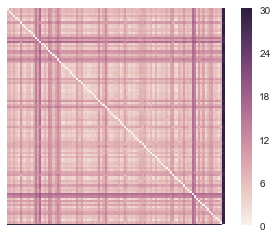

In [203]:
import seaborn as sns; sns.set()
import sklearn.manifold
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

dists = metrics.euclidean_distances(Similarity)

%matplotlib inline

_ = sns.heatmap(dists, xticklabels=False, yticklabels=False,
linewidths=0, square = True, cbar="YIGnBu")



Provide an interpretation of the heatmap's results in the following markdown cell. **(5 pts)**

There appear to be approximately three subgroups within the top 100 users in terms of the groups of tags they use. Also, it appears that if users use a lot of one tag, they use a lot of many tags, in the sense that users who are very similar to one user are very similar to many users. 

-----------------